Data loaded from C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/portfolio-management-optimization/data/TSLA_processed.csv.
Data loaded from C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/portfolio-management-optimization/data/BND_processed.csv.
Data loaded from C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/portfolio-management-optimization/data/SPY_processed.csv.


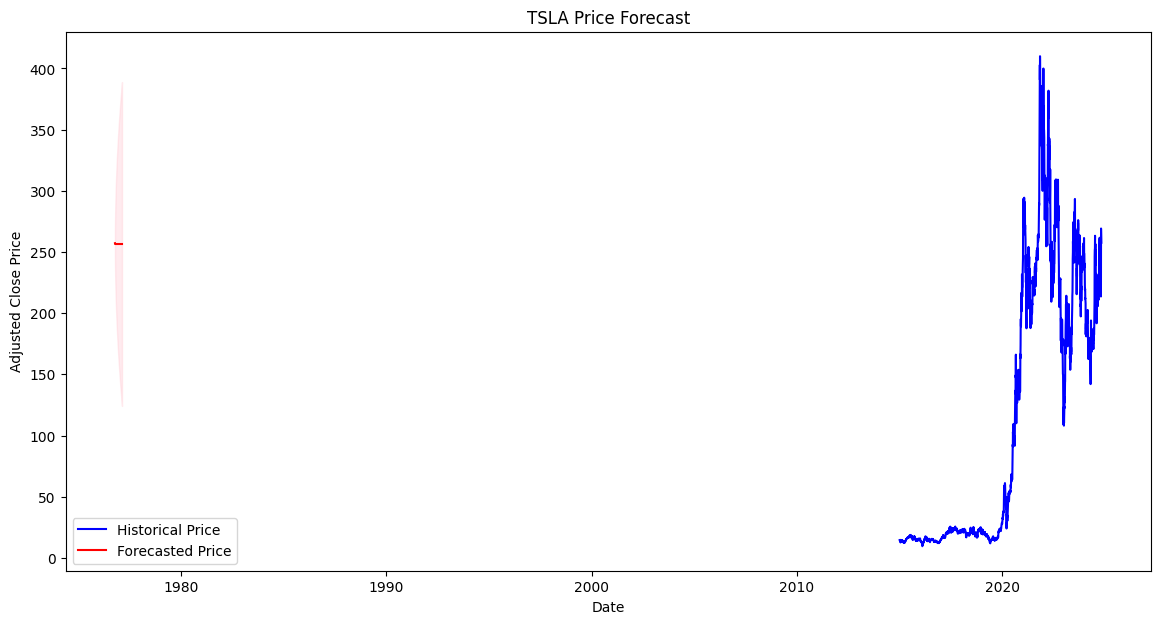

Trend Analysis: The trend is expected to be downward.
Volatility (forecasted std deviation): 0.06
Confidence Intervals: Shows the expected range of future prices.

High Volatility Periods Detected:
           lower       upper    Forecast   CI_width
2474  245.562939  268.768151  257.165545  23.205212
2475  240.430184  272.775107  256.602645  32.344923
2476  236.797402  276.361207  256.579305  39.563806
2477  233.710085  279.330854  256.520469  45.620769
2478  230.750021  282.330407  256.540214  51.580386
2479  228.167924  284.860248  256.514086  56.692324
2480  225.824037  287.226048  256.525043  61.402011
2481  223.637260  289.405673  256.521466  65.768413
2482  221.578922  291.469199  256.524060  69.890277
2483  219.640687  293.403338  256.522013  73.762651

Market Opportunities and Risks:
Risk Alert: Expected price decline indicates potential bearish trend.
Volatility Analysis: Higher volatility may indicate increased market risk.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

# File paths
TSLA_PATH = "C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/portfolio-management-optimization/data/TSLA_processed.csv"
BND_PATH = "C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/portfolio-management-optimization/data/BND_processed.csv"
SPY_PATH = "C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/portfolio-management-optimization/data/SPY_processed.csv"

# Step 1: Load and preprocess data
def load_data(file_path):
    data = pd.read_csv(file_path, index_col='Date', parse_dates=True)
    data = data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
    print(f"Data loaded from {file_path}.")
    return data

# Step 2: Train ARIMA model on historical data
def train_arima_model(data, order=(5,1,0)):
    model = ARIMA(data['Adj Close'], order=order)
    model_fit = model.fit()
    return model_fit

# Step 3: Forecast future values
def forecast_future(model, steps=126):
    forecast = model.get_forecast(steps=steps)
    forecast_df = forecast.conf_int(alpha=0.05)
    forecast_df['Forecast'] = forecast.predicted_mean
    forecast_df.columns = ['lower', 'upper', 'Forecast']
    return forecast_df

# Step 4: Visualize historical and forecasted data with confidence intervals
def plot_forecast(data, forecast_df, asset_name):
    plt.figure(figsize=(14, 7))
    plt.plot(data['Adj Close'], label="Historical Price", color='blue')
    plt.plot(forecast_df['Forecast'], color='red', label="Forecasted Price")
    plt.fill_between(forecast_df.index, forecast_df['lower'], forecast_df['upper'], color='pink', alpha=0.3)
    plt.title(f"{asset_name} Price Forecast")
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close Price")
    plt.legend()
    plt.show()

# Step 5: Analyze forecast results
def analyze_forecast(forecast_df):
    # Trend Analysis
    trend = "upward" if forecast_df['Forecast'].iloc[-1] > forecast_df['Forecast'].iloc[0] else "downward"
    volatility = np.std(forecast_df['Forecast'])
    
    print(f"Trend Analysis: The trend is expected to be {trend}.")
    print(f"Volatility (forecasted std deviation): {volatility:.2f}")
    print("Confidence Intervals: Shows the expected range of future prices.")
    
    # Identify high volatility periods based on confidence interval width
    forecast_df['CI_width'] = forecast_df['upper'] - forecast_df['lower']
    high_volatility_periods = forecast_df[forecast_df['CI_width'] > 2 * volatility]

    if not high_volatility_periods.empty:
        print("\nHigh Volatility Periods Detected:")
        print(high_volatility_periods[['lower', 'upper', 'Forecast', 'CI_width']].head(10))  # Display only the first 10 for brevity
    
    # Market Opportunities and Risks
    print("\nMarket Opportunities and Risks:")
    if trend == "upward":
        print("Potential Opportunity: Expected price increase suggests a bullish trend.")
    elif trend == "downward":
        print("Risk Alert: Expected price decline indicates potential bearish trend.")
    print("Volatility Analysis: Higher volatility may indicate increased market risk.")

# Main Function
def main():
    # Load data directly from existing CSV files
    tsla_data = load_data(TSLA_PATH)
    bnd_data = load_data(BND_PATH)
    spy_data = load_data(SPY_PATH)
    
    # Train the model on TSLA for forecast analysis
    tsla_model = train_arima_model(tsla_data)
    
    # Forecasting 6 months (approx. 126 trading days)
    tsla_forecast = forecast_future(tsla_model, steps=126)
    
    # Plot forecast
    plot_forecast(tsla_data, tsla_forecast, "TSLA")
    
    # Analyze forecast results
    analyze_forecast(tsla_forecast)

# Run main function
main()
